In [1]:
# Load all libraries

import xarray as xr
import pathlib
from os import listdir
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
from matplotlib import gridspec
import matplotlib
import xesmf as xe
import cartopy

# Green's Functions

In [2]:
surface_greens = xr.open_dataarray('/data/keeling/a/mailes2/cesmle_variability_analysis/processed_data/paper1/fig_3_surface_green.nc')
surface_greens.load()

toa_greens = xr.open_dataarray('/data/keeling/a/mailes2/cesmle_variability_analysis/processed_data/paper1/fig3_toa_green.nc')
toa_greens.load()

heat_transport = surface_greens - toa_greens

# F Compset

In [3]:
F_surface = xr.open_dataarray('/data/keeling/a/mailes2/a/alt_compset_processed/CESM1_F_Surfacefluxes.nc')
F_surface.load()

<xarray.DataArray (time: 31200, lat: 88, lon: 179)>
array([[[  8.62163239,   9.02538258,   8.65274147, ...,   9.0952664 ,
           9.27236657,   8.96530676],
        [ 10.15755554,  10.61734646,  10.74720198, ...,   8.9361226 ,
           9.1932732 ,   9.50097531],
        [ 11.7818783 ,  11.42139207,  12.30058886, ...,  12.049076  ,
          12.36791089,  12.07719091],
        ...,
        [-47.32660489, -47.889087  , -48.24876641, ..., -45.06398043,
         -45.06673503, -45.62065961],
        [-46.93219788, -47.35113871, -47.58818637, ..., -45.67322297,
         -45.83200845, -46.13973764],
        [-47.05961934, -47.16093085, -47.27720436, ..., -46.62180387,
         -46.71897919, -46.82716357]],

       [[ -1.45486016,  -1.67957138,  -1.58597515, ...,  -1.6846536 ,
          -1.73741583,  -1.60655399],
        [ -1.58876326,  -1.916327  ,  -2.01013332, ...,  -1.26176678,
          -1.31150215,  -1.38182034],
        [ -0.05508561,  -0.06617486,  -0.55374956, ...,   0.33730161,
           0.15684975,   0.18004003],
...
        [-19.28634355, -19.56592512, -19.70394678, ..., -15.35097651,
         -15.74297308, -16.63741664],
        [-19.47681191, -19.78439383, -19.15181469, ..., -18.6175159 ,
         -18.65537376, -18.62834468],
        [-20.13292431, -20.04167974, -20.0027929 , ..., -20.45634755,
         -20.27258415, -20.20589501]],

       [[ 15.69131299,  14.79304967,  16.28863014, ...,  14.61499625,
          14.39205867,  15.43308367],
        [ 16.19037129,  16.77507444,  17.79209624, ...,  14.23663784,
          14.825703  ,  15.51034506],
        [ 17.86847772,  17.59344248,  18.38158494, ...,  17.491218  ,
          17.4600536 ,  17.98489354],
        ...,
        [-17.75254067, -18.28537521, -18.62396615, ..., -13.97926999,
         -14.24372591, -15.10283214],
        [-18.53885043, -18.84872195, -18.34409721, ..., -17.52842807,
         -17.61835406, -17.68627164],
        [-18.43096869, -18.29864592, -18.26888454, ..., -18.85546387,
         -18.73876685, -18.65344958]]])
Coordinates:
  * time     (time) object 0001-02-01 00:00:00 ... 2601-01-01 00:00:00
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357

# F Compset Surface Variability

In [4]:
F_surface_std = F_surface.std('time')

In [5]:
F_surface_rolling = F_surface.rolling(time=120, center=True).mean('time')
F_10yr_std = F_surface_rolling.std('time')

# Plot

Text(0.5, 1.0, "Green's Functions Horiz $\\lambda$")

/data/keeling/a/mailes2/miniconda3/envs/paleoproj/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


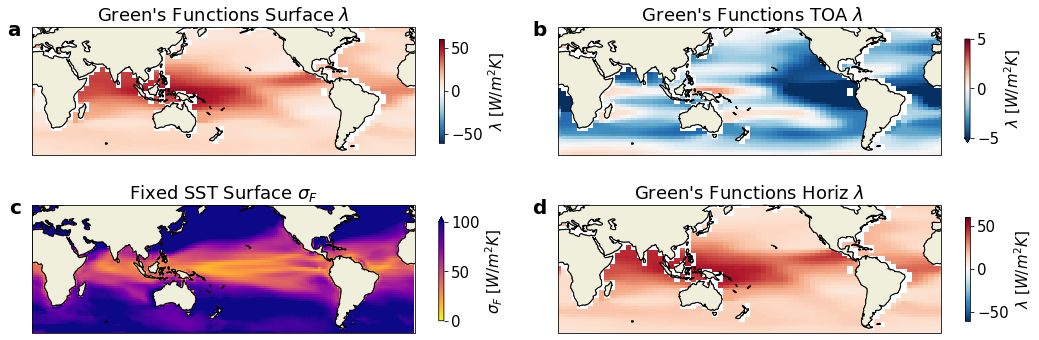

In [6]:
fig = plt.figure(figsize=(18, 6), tight_layout=True)
gs = gridspec.GridSpec(ncols=2,nrows=2)
gs.update(wspace=0.1)
#top=300
#bottom=270
font = {'size'   : 15,
        'weight' : 'normal'}

matplotlib.rc('font', **font)

ax1 = fig.add_subplot(gs[0,0], projection=ccrs.PlateCarree(central_longitude=180))
surface_greens.plot(ax=ax1, transform=ccrs.PlateCarree(), vmin=-60, vmax=60, cmap='RdBu_r', 
                       cbar_kwargs={'shrink': 0.7, 
                                    'label': r'$\lambda$ [$W/m^2K$]'})
ax1.coastlines(color='black', linewidth=1)
ax1.text(-0.03, 1.05, 'a', transform=ax1.transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')
ax1.add_feature(cartopy.feature.LAND, zorder=2, edgecolor='k')
ax1.set_extent([0,359,-60,60], crs=ccrs.PlateCarree())
ax1.set_title(r"Green's Functions Surface $\lambda$")

ax2 = fig.add_subplot(gs[0,1], projection=ccrs.PlateCarree(central_longitude=180))
toa_greens.plot(ax=ax2, transform=ccrs.PlateCarree(), vmin=-5, vmax=5, cmap='RdBu_r',
                             cbar_kwargs={'shrink': 0.7, 
                                          'label': r'$\lambda$ [$W/m^2K$]'})
ax2.coastlines(color='black', linewidth=1)
ax2.text(-0.03, 1.05, 'b', transform=ax2.transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')
ax2.add_feature(cartopy.feature.LAND, zorder=2, edgecolor='k')
ax2.set_extent([0,359,-60,60], crs=ccrs.PlateCarree())
ax2.set_title(r" Green's Functions TOA $\lambda$")

ax3 = fig.add_subplot(gs[1,0], projection=ccrs.PlateCarree(central_longitude=180))
F_surface_std.plot(ax=ax3, transform=ccrs.PlateCarree(), vmin=0, vmax=100, cmap='plasma_r',
                             cbar_kwargs={'shrink': 0.7, 
                                          'label': r'$\sigma_F$ [$W/m^2K$]'})
ax3.coastlines(color='black', linewidth=1)
ax3.text(-0.03, 1.05, 'c', transform=ax3.transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')
ax3.add_feature(cartopy.feature.LAND, zorder=2, edgecolor='k')
ax3.set_extent([0,359,-60,60], crs=ccrs.PlateCarree())
ax3.set_title(r'Fixed SST Surface $\sigma_F$ ')

ax4 = fig.add_subplot(gs[1,1], projection=ccrs.PlateCarree(central_longitude=180))
heat_transport.plot(ax=ax4, transform=ccrs.PlateCarree(), vmin=-60, vmax=60, cmap='RdBu_r',
                             cbar_kwargs={'shrink': 0.7, 
                                          'label': r'$\lambda$ [$W/m^2K$]'})
ax4.coastlines(color='black', linewidth=1)
ax4.text(-0.03, 1.05, 'd', transform=ax4.transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')
ax4.add_feature(cartopy.feature.LAND, zorder=2, edgecolor='k')
ax4.set_extent([0,359,-60,60], crs=ccrs.PlateCarree())
ax4.set_title(r"Green's Functions Horiz $\lambda$")

Text(0.5, 1.0, 'Horiz $\\lambda$')

/data/keeling/a/mailes2/miniconda3/envs/paleoproj/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


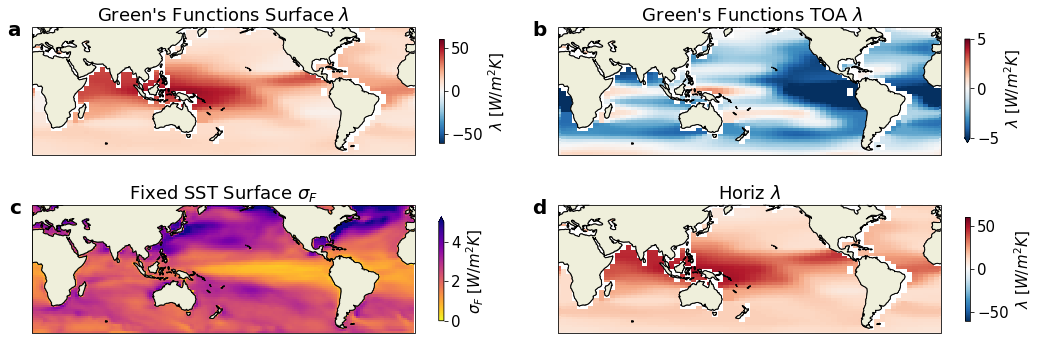

In [21]:
fig = plt.figure(figsize=(18, 6), tight_layout=True)
gs = gridspec.GridSpec(ncols=2,nrows=2)
gs.update(wspace=0.1)
#top=300
#bottom=270
font = {'size'   : 15,
        'weight' : 'normal'}

matplotlib.rc('font', **font)

ax1 = fig.add_subplot(gs[0,0], projection=ccrs.PlateCarree(central_longitude=180))
surface_greens.plot(ax=ax1, transform=ccrs.PlateCarree(), vmin=-60, vmax=60, cmap='RdBu_r', 
                       cbar_kwargs={'shrink': 0.7, 
                                    'label': r'$\lambda$ [$W/m^2K$]'})
ax1.coastlines(color='black', linewidth=1)
ax1.text(-0.03, 1.05, 'a', transform=ax1.transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')
ax1.add_feature(cartopy.feature.LAND, zorder=2, edgecolor='k')
ax1.set_extent([0,359,-60,60], crs=ccrs.PlateCarree())
ax1.set_title(r"Green's Functions Surface $\lambda$")

ax2 = fig.add_subplot(gs[0,1], projection=ccrs.PlateCarree(central_longitude=180))
toa_greens.plot(ax=ax2, transform=ccrs.PlateCarree(), vmin=-5, vmax=5, cmap='RdBu_r',
                             cbar_kwargs={'shrink': 0.7, 
                                          'label': r'$\lambda$ [$W/m^2K$]'})
ax2.coastlines(color='black', linewidth=1)
ax2.text(-0.03, 1.05, 'b', transform=ax2.transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')
ax2.add_feature(cartopy.feature.LAND, zorder=2, edgecolor='k')
ax2.set_extent([0,359,-60,60], crs=ccrs.PlateCarree())
ax2.set_title(r" Green's Functions TOA $\lambda$")

ax3 = fig.add_subplot(gs[1,0], projection=ccrs.PlateCarree(central_longitude=180))
F_10yr_std.plot(ax=ax3, transform=ccrs.PlateCarree(), vmin=0, vmax=5, cmap='plasma_r',
                             cbar_kwargs={'shrink': 0.7, 
                                          'label': r'$\sigma_F$ [$W/m^2K$]'})
ax3.coastlines(color='black', linewidth=1)
ax3.text(-0.03, 1.05, 'c', transform=ax3.transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')
ax3.add_feature(cartopy.feature.LAND, zorder=2, edgecolor='k')
ax3.set_extent([0,359,-60,60], crs=ccrs.PlateCarree())
ax3.set_title(r'Fixed SST Surface $\sigma_F$ ')

ax4 = fig.add_subplot(gs[1,1], projection=ccrs.PlateCarree(central_longitude=180))
heat_transport.plot(ax=ax4, transform=ccrs.PlateCarree(), vmin=-60, vmax=60, cmap='RdBu_r',
                             cbar_kwargs={'shrink': 0.7, 
                                          'label': r'$\lambda$ [$W/m^2K$]'})
ax4.coastlines(color='black', linewidth=1)
ax4.text(-0.03, 1.05, 'd', transform=ax4.transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')
ax4.add_feature(cartopy.feature.LAND, zorder=2, edgecolor='k')
ax4.set_extent([0,359,-60,60], crs=ccrs.PlateCarree())
ax4.set_title(r'Horiz $\lambda$')